In [0]:
#Import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
import datetime

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-darkgrid')
plt.rc('figure', figsize=(16,10))
plt.rc('lines', markersize=4)

In [0]:
#Get the stock quote
data = web.DataReader('AAPL', data_source='yahoo', start='2010-01-01', end='2020-01-01')
#Show teh data
data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,26.538483
2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,26.584366
2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,26.161509
2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,26.113146
2010-01-08,30.285715,29.865715,30.042856,30.282858,111902700.0,26.286753
...,...,...,...,...,...,...
2019-12-24,284.890015,282.920013,284.690002,284.269989,12119700.0,283.596924
2019-12-26,289.980011,284.700012,284.820007,289.910004,23280300.0,289.223602
2019-12-27,293.970001,288.119995,291.119995,289.799988,36566500.0,289.113831


In [0]:
# Create a new DataFrame with only closing price and date
df = pd.DataFrame(data, columns=['Adj Close'])

# Reset index column so that we have integers to represent time for later analysis
df = df.reset_index()

In [0]:
df.head()

,Date,Adj Close
0,2010-01-04,26.538483
1,2010-01-05,26.584366
2,2010-01-06,26.161509
3,2010-01-07,26.113146
4,2010-01-08,26.286753


In [0]:
# Check for missing values in the columns
df.isna().values.any()

False

In [0]:
# Import package for splitting data set
from sklearn.model_selection import train_test_split

In [0]:
# Split data into train and test set: 80% / 20%
train, test = train_test_split(df, test_size=0.20)

In [0]:
# Import package for linear model
from sklearn.linear_model import LinearRegression

In [0]:
# Reshape index column to 2D array for .fit() method
X_train = np.array(train.index).reshape(-1, 1)
y_train = train['Adj Close']

In [0]:
# Create LinearRegression Object
model = LinearRegression()
# Fit linear model using the train data set
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:

# The coefficient
print('Slope: ', np.asscalar(np.squeeze(model.coef_)))
# The Intercept
print('Intercept: ', model.intercept_)

Slope:  0.0740580705661851
Intercept:  10.700311140772882


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  """Entry point for launching an IPython kernel.


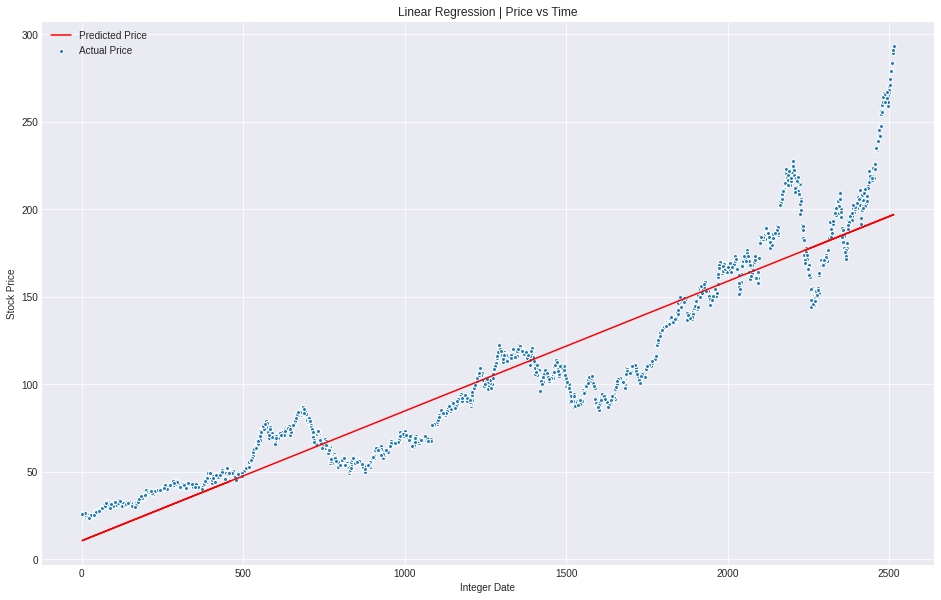

In [0]:
# Train set graph
plt.figure(1, figsize=(16,10))
plt.title('Linear Regression | Price vs Time')
plt.scatter(X_train, y_train, edgecolor='w', label='Actual Price')
plt.plot(X_train, model.predict(X_train), color='r', label='Predicted Price')
plt.xlabel('Integer Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [0]:
X_test = np.array(test.index).reshape(-1, 1)
y_test = test['Adj Close']


In [0]:
# Generate array with predicted values
y_pred = model.predict(X_test)
df['Prediction'] = model.predict(np.array(df.index).reshape(-1, 1))


In [0]:
df.head()

,Date,Adj Close,Prediction
0,2010-01-04,26.538483,10.700311
1,2010-01-05,26.584366,10.774369
2,2010-01-06,26.161509,10.848427
3,2010-01-07,26.113146,10.922485
4,2010-01-08,26.286753,10.996543


In [0]:

# Generate 25 random numbers
randints = np.random.randint(2550, size=25)

# Select row numbers == random numbers
df_sample = df[df.index.isin(randints)]

In [0]:
df_sample.head()

,Date,Adj Close,Prediction
12,2010-01-21,25.801886,11.589008
226,2010-11-24,39.037033,27.437435
246,2010-12-23,40.128281,28.918597
345,2011-05-17,41.683311,36.250345
468,2011-11-09,49.017017,45.359488


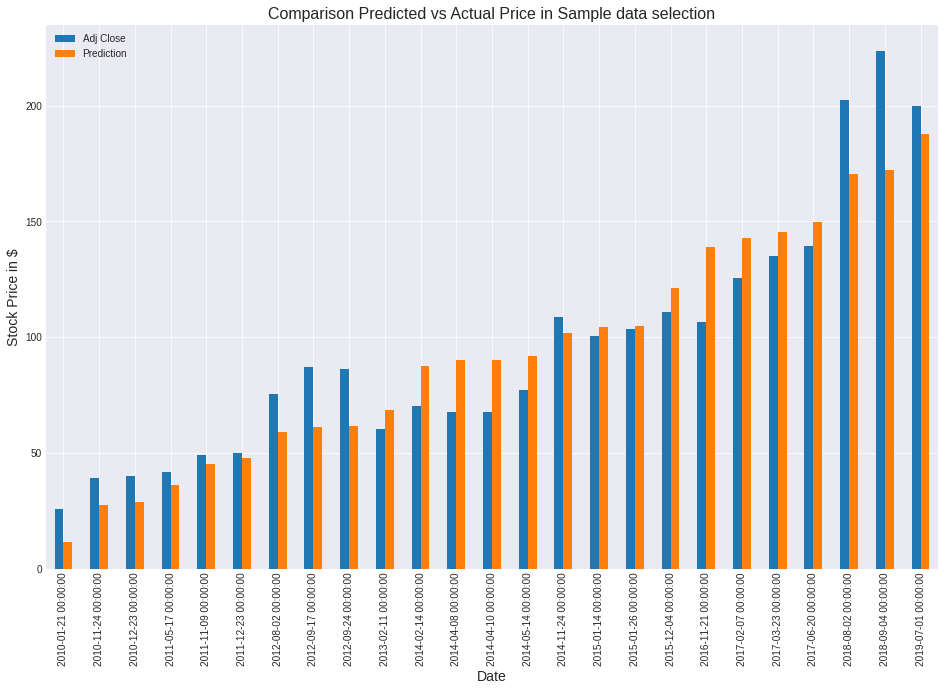

In [0]:
# Create subplots to plot graph and control axes
fig, ax = plt.subplots()
df_sample.plot(x='Date', y=['Adj Close', 'Prediction'], kind='bar', ax=ax)

# Set figure title
plt.title('Comparison Predicted vs Actual Price in Sample data selection', fontsize=16)

# 

# Set x label
plt.xlabel('Date', fontsize=14)

# Set y label
plt.ylabel('Stock Price in $', fontsize=14)

# Show plot
plt.show()

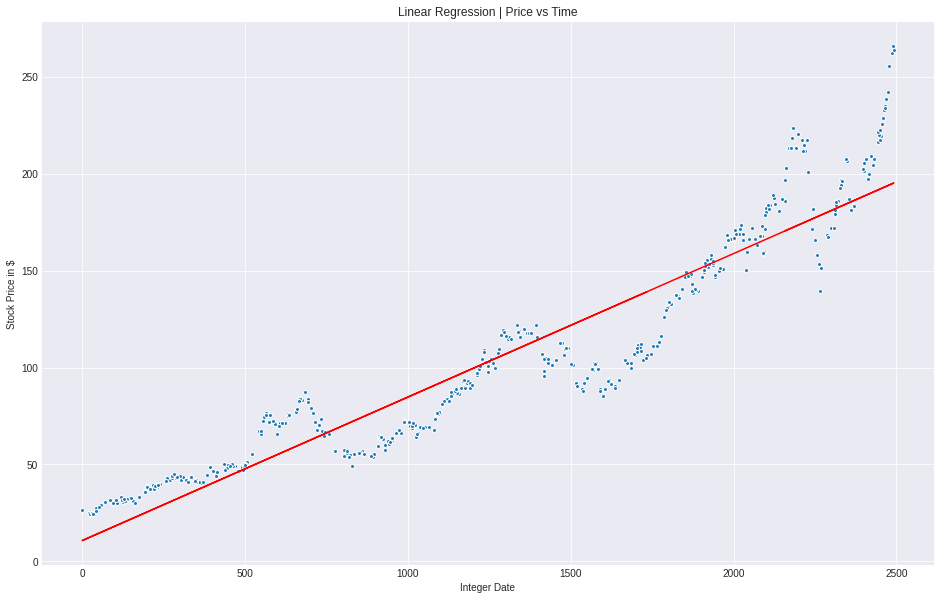

In [0]:
# Plot fitted line, y test
plt.figure(1, figsize=(16,10))
plt.title('Linear Regression | Price vs Time')
plt.plot(X_test, model.predict(X_test), color='r', label='Predicted Price')
plt.scatter(X_test, y_test, edgecolor='w', label='Actual Price')

plt.xlabel('Integer Date')
plt.ylabel('Stock Price in $')

plt.show()

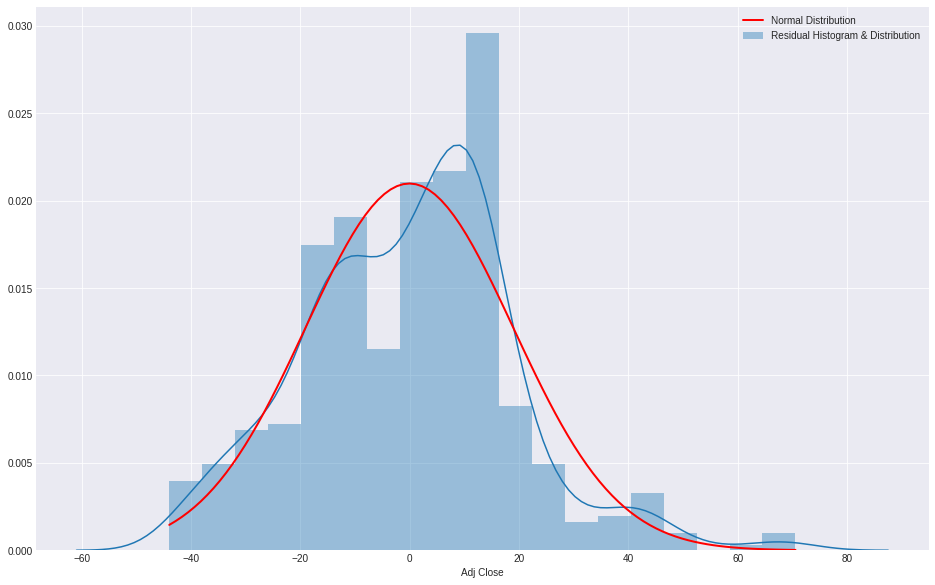

In [0]:

# Import norm package to plot normal distribution
from scipy.stats import norm

# Fit a normal distribution to the data:
mu, std = norm.fit(y_test - y_pred)

ax = sns.distplot((y_test - y_pred), label='Residual Histogram & Distribution')

# Calculate the pdf over a range of values         
x = np.linspace(min(y_test - y_pred), max(y_test - y_pred), 100)
p = norm.pdf(x, mu, std)

# And plot on the same axes that seaborn put the histogram
ax.plot(x, p, 'r', lw=2, label='Normal Distribution') 

plt.legend()
plt.show()

In [0]:
# Import metrics package from sklearn for statistical analysis
from sklearn import metrics

In [0]:
# Calculate and print values of MAE, MSE, RMSE
#print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
#print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred)) 
print('Mean Absolute Percentage Error:', np.mean(np.abs((y_test - y_pred) / y_test)*100)) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Percentage Error: 17.74686079243013
Root Mean Squared Error: 19.013428352343553


In [0]:
print('R2: ', metrics.r2_score(y_test, y_pred))

R2:  0.8886652604842128
